1. Load the required libraries and read the dataset

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [271]:
df=pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features

In [272]:
df.shape

(192544, 16)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

● Data cleansing and Exploratory data analysis:

3. Check if there are any duplicate records in the dataset? If any, drop them.

In [274]:
# Check for duplicate records
duplicate_records = df.duplicated()
print("Number of duplicate records:", duplicate_records.sum())


Number of duplicate records: 0


hence there is no duplicate records

 4.Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [275]:
# Drop the redundant columns
df = df.drop(['user_id', 'review_text', 'review_summary', 'review_date'], axis=1)

In [237]:
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


5.Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [238]:
# Check the data type of the 'weight' column
print(df['weight'].dtype)

object


In [239]:

# Remove the 'lbs' suffix and convert to float
df['weight'] = df['weight'].str.replace('lbs', '').astype(float)

In [240]:
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'

In [241]:
# Check the unique categories for the 'rented for' column
unique_categories = df['rented for'].unique()

In [242]:
# Group 'party: cocktail' category with 'party'
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')

In [243]:
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [244]:
# Define a custom conversion function
def convert_height(height):
    if isinstance(height, str):
        height = height.replace('"', '')  # Remove the quotation mark
        feet, inches = height.split("'")  # Split the feet and inches
        total_inches = int(feet) * 12 + int(inches)  # Convert feet to inches and add inches
        return float(total_inches)  # Convert to float
    else:
        return height  # Return the original value for float values

In [245]:

# Apply the conversion function to the 'height' column
df['height'] = df['height'].apply(convert_height)

In [246]:
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. 

In [247]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Unnamed: 0        0
fit               0
bust size     18411
item_id           0
weight        29982
rating           82
rented for       10
body type     14637
category          0
height          677
size              0
age             960
dtype: int64


In [248]:
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [249]:
df.isnull().sum()/len(df) * 100

Unnamed: 0    0.0
fit           0.0
bust size     0.0
item_id       0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [250]:
df.describe()

,Unnamed: 0,item_id,weight,rating,height,size,age
count,192544.000000,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,1.045684e+06,137.019284,9.092758,65.309529,12.245175,33.861689
std,55582.809453,8.053148e+05,20.141448,1.429862,2.658857,8.494877,8.039050
min,0.000000,1.233730e+05,50.000000,2.000000,54.000000,0.000000,0.000000
25%,48135.750000,1.950760e+05,125.000000,8.000000,63.000000,8.000000,29.000000
50%,96271.500000,9.483960e+05,135.000000,10.000000,65.000000,12.000000,32.000000
75%,144407.250000,1.678888e+06,145.000000,10.000000,67.000000,16.000000,37.000000
max,192543.000000,2.966087e+06,300.000000,10.000000,78.000000,58.000000,117.000000


10. Are there outliers present in the column age? If yes, treat them with the appropriate method. 

<Axes: xlabel='age'>

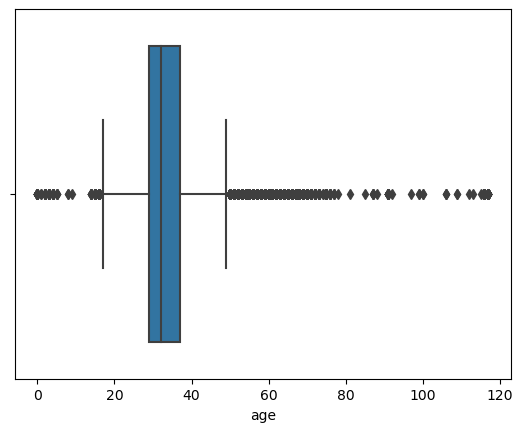

In [251]:
# Plotting the boxplot before treatment
sns.boxplot(data=df, x='age')

In [253]:
# Calculate the IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [(df['age'] < lower_bound) | (df['age'])]
print(outliers)

[0         True
1         True
2         True
3         True
4         True
          ... 
192539    True
192540    True
192541    True
192542    True
192543    True
Name: age, Length: 192544, dtype: bool]


<Axes: xlabel='age'>

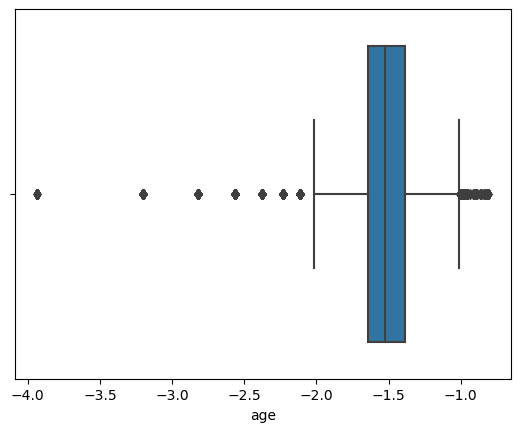

In [256]:
# Applying log transformation to the 'total bill' column
df['age'] = np.log(df['age'])
# Plotting the boxplot after treatment
sns.boxplot(data=df, x='age')

11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. 

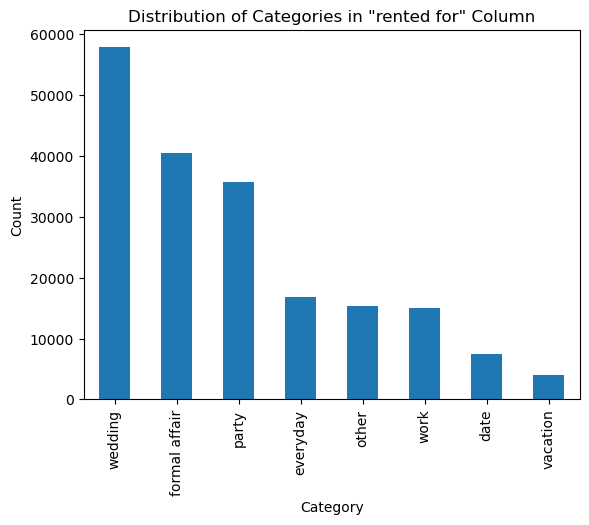

In [257]:
import matplotlib.pyplot as plt
import pandas as pd

df['rented for'].value_counts().plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in "rented for" Column')

plt.show()

● Data Preparation for model building: 

2. Encode the categorical variables in the dataset.

In [258]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['fit', 'bust size', 'rented for', 'body type', 'category']


In [259]:
categorical_cols =['fit', 'bust size', 'rented for', 'body type', 'category'] # List of categorical column names

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated dataframe
df.head()

,Unnamed: 0,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,0,39,2260466,137.0,10.0,5,3,44,68.0,14,-1.685534
1,1,0,37,153475,132.0,10.0,3,6,20,66.0,12,-1.410584
2,2,0,37,1063761,135.0,10.0,4,3,45,64.0,4,-0.811975
3,3,0,38,126335,135.0,8.0,2,4,16,65.0,8,-1.463940
4,4,0,37,616682,145.0,10.0,6,1,20,69.0,12,-1.736214


13. Standardize the data, so that the values are within a particular range.

In [260]:
ds=df.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds =pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [261]:
scaled_ds

,Unnamed: 0,item_id,weight,rating,height,size,age
0,-1.732042,1.508460,-0.000957,0.634498,1.011893,0.206575,-0.630131
1,-1.732024,-1.107903,-0.249202,0.634498,0.259688,-0.028862,0.497543
2,-1.732006,0.022448,-0.100255,0.634498,-0.492517,-0.970608,2.952667
3,-1.731988,-1.141604,-0.100255,-0.764242,-0.116415,-0.499735,0.278711
4,-1.731970,-0.532714,0.396235,0.634498,1.387995,-0.028862,-0.837987
...,...,...,...,...,...,...,...
192539,1.731970,1.498956,0.147990,0.634498,1.387995,-0.499735,1.009876
192540,1.731988,-0.451552,-1.837970,0.634498,-1.620824,-0.970608,-0.442717
192541,1.732006,-0.450052,-0.100255,-2.162982,1.011893,-0.499735,-0.117228
192542,1.732024,-1.141604,1.389214,0.634498,0.259688,0.442012,-0.117228


● Principal Component Analysis and Clustering

14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same

In [264]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_ds.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519e+00 -2.69296026e-03  4.81151242e-04 -2.79599879e-03
   3.32855695e-03  7.71673203e-04             nan]
 [-2.69296026e-03  1.00000519e+00 -3.08500948e-02 -1.46500776e-03
   4.65669726e-03 -4.43115259e-02             nan]
 [ 4.81151242e-04 -3.08500948e-02  1.00000519e+00 -2.08485232e-02
   3.49055850e-01  7.23391050e-01             nan]
 [-2.79599879e-03 -1.46500776e-03 -2.08485232e-02  1.00000519e+00
   1.74835660e-03 -3.67286881e-02             nan]
 [ 3.32855695e-03  4.65669726e-03  3.49055850e-01  1.74835660e-03
   1.00000519e+00  2.28425433e-01             nan]
 [ 7.71673203e-04 -4.43115259e-02  7.23391050e-01 -3.67286881e-02
   2.28425433e-01  1.00000519e+00             nan]
 [            nan             nan             nan             nan
              nan             nan             nan]]


In [268]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

LinAlgError: Array must not contain infs or NaNs

In [22]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [19.530430223941934, 16.914234678551445, 16.706302271224818, 16.63936500158559, 16.37827473069575, 13.831393094000473]
Cummulative Variance Explained:  [ 19.53043022  36.4446649   53.15096717  69.79033218  86.16860691
 100.        ]


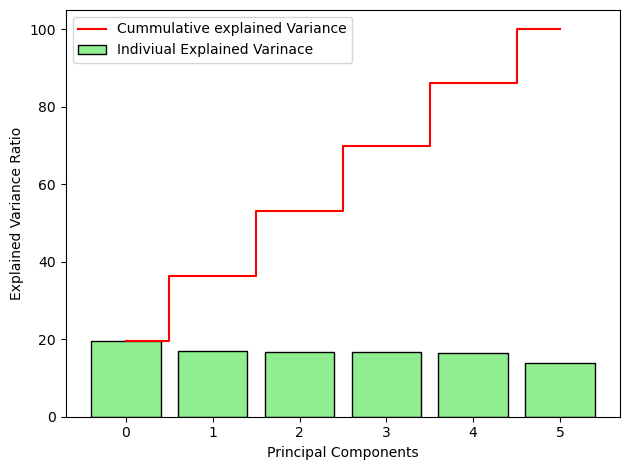

In [29]:
## Scree plot
plt.bar(range(6),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(6), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

15. Apply K-means clustering and segment the data. (You may use original
data or PCA transformed data) (8)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value
from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means
clustering technique.


In [10]:
sum_of_squared_distances = []
k_values = range(1, 11)  # Range of K values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sum_of_squared_distances.append(kmeans.inertia_)

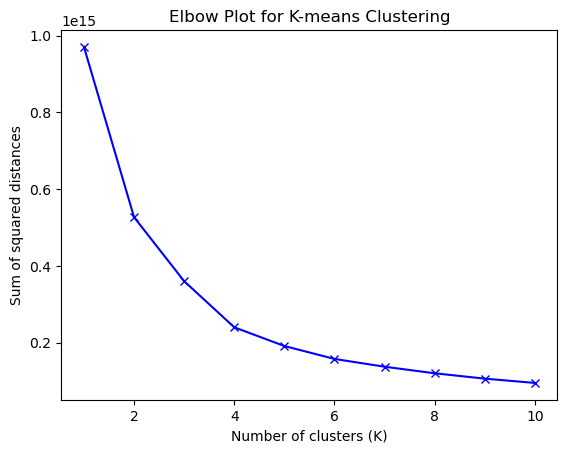

In [90]:
# Plotting the elbow plot
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Plot for K-means Clustering')
plt.show()

In [11]:
# Assuming the optimal K value is stored in a variable called 'optimal_k'
optimal_k = 3  # Replace with the actual optimal K value
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(df)

KMeans(n_clusters=3)

In [30]:
# Accessing the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

In [35]:
# Assuming the data and cluster labels are stored in variables called 'df' and 'cluster_labels' respectively
silhouette_avg = silhouette_score(df,cluster_labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.3925930964782214


16. Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data) (8)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time

In [ ]:
sample_size = 1000  # Number of samples to use for Agglomerative clustering
sample_indices = np.random.choice(len(df), size=sample_size, replace=False)
sample_data = df[sample_indices]
Z = linkage(sample_data, method='ward')  # Calculate the linkage matrix using Ward's method

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

In [269]:
# Assuming the optimal K value is stored in a variable called 'optimal_k'
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative.fit(df)

# Accessing the cluster labels assigned to each data point
cluster_labels = agglomerative.labels_

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Assuming the cluster labels are stored in a variable called 'cluster_labels'
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your  conclusion on the results